# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

**Wesley de Oliveira Mendes, 828.507**

## Tarefa 06 - Hough Transform
- Objetivo
    - Aplicar a Transformada de Hough para detecção de linhas e círculos.

### Download das imagens

In [30]:
!mkdir data >/dev/null 2>&1
!wget 'https://i.imgur.com/XscItI7.jpg' -O 'data/airport-runway.jpg' >/dev/null 2>&1
!wget 'https://i.imgur.com/KH0uG8v.jpg' -O 'data/laranjas.jpg' >/dev/null 2>&1

### Imports

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

#### Exercício 1

Faça uma pesquisa na internet de uma **pista do aeroporto** da sua preferência, e aplique a transformada de Hough para detecção das três principais linhas da pista.

Para a pista escolhida é necessário detectar três linhas: esquerda, central e direita.

Apresente como resultado as linhas detectadas sobrepostas na imagem escolhida.

In [32]:
exe1_img1 = cv.imread('data/airport-runway.jpg')
exe1_img2 = exe1_img1.copy()

In [33]:
exe1_img2 = cv.cvtColor(exe1_img2, cv.COLOR_BGR2GRAY)
exe1_img2 = cv.Canny(exe1_img2, 500, 200)

# Transformada de Hough
p1 = 180    # linhas menores que 180 pixels serao descartadas
p2 = 150    # gap com no maximo 150 pixels
p3 = 50     # o numero minimo de interseccoes para detectar a linha

lines = cv.HoughLinesP(exe1_img2, 1, np.pi / 180, threshold=p3, minLineLength=p1, maxLineGap=p2)

exe1_img3 = exe1_img1.copy()
if lines is not None:
    print(f'Qtde linhas encontradas: {len(lines)}')

    # exibir as linhas
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(exe1_img3,(x1, y1), (x2, y2),(255, 0, 0), 20)
else:
    print('Nenhuma linha encontrada.')

Qtde linhas encontradas: 22


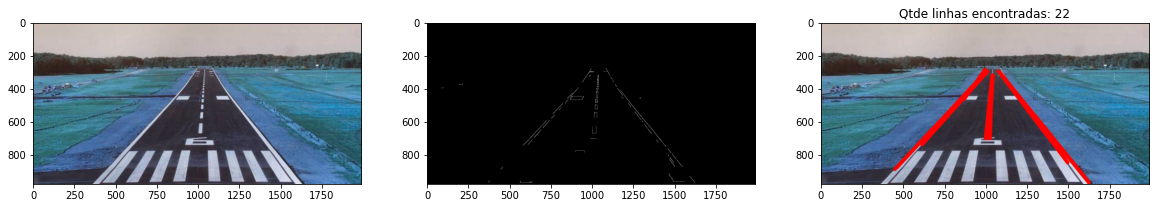

In [34]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(exe1_img1)
plt.subplot(132), plt.imshow(exe1_img2, cmap='gray')
plt.subplot(133), plt.imshow(exe1_img3), plt.title(f'Qtde linhas encontradas: {len(lines)}')
plt.show()

#### Exercício 2

Utilize a Transformada de Hough para detectar quantas **laranjas** estão presentes na [imagem](https://drive.google.com/file/d/1Wyn9tFpguizJqSYUgM3nK7T2DL8Fxl-m/view?usp=sharing). Você pode considerar apenas as laranjas inteiras.

Apresente como resultado a quantidade de laranjas e os círculos detectados sobrepostos na imagem.

In [35]:
exe2_img1 = cv.imread('data/laranjas.jpg')
exe2_img2 = exe2_img1.copy()
exe2_img1 = cv.cvtColor(exe2_img1, cv.COLOR_BGR2RGB)

In [36]:
exe2_img2 = cv.cvtColor(exe2_img2, cv.COLOR_BGR2GRAY)
exe2_img2 = cv.medianBlur(exe2_img2, 5)

# Transformada de Hough
oranges = cv.HoughCircles(exe2_img2,cv.HOUGH_GRADIENT, 1, 120, param1=120, param2=30, minRadius=0, maxRadius=0)
oranges = np.uint16(np.around(oranges))

exe2_img3 = exe2_img1.copy()
if oranges is not None:
    print(f'Qtde de laranjas encontrados: {len(oranges[0, :])}')

    for orange in oranges[0,:]:
        cv.circle(exe2_img3, (orange[0], orange[1]), orange[2], (255, 0, 0), 10)

Qtde de laranjas encontrados: 12


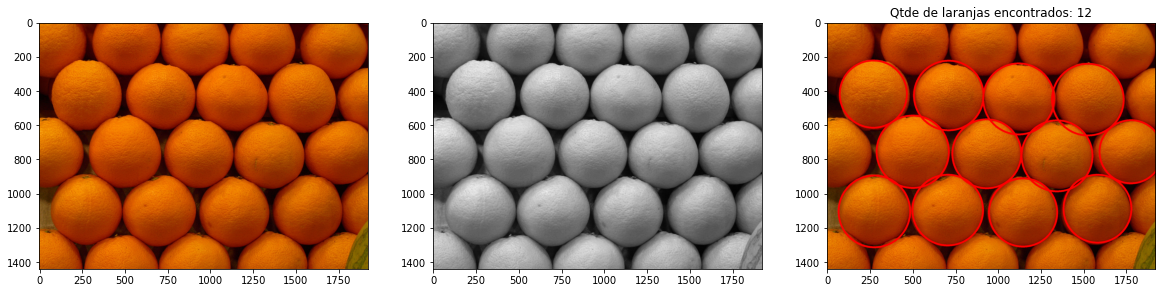

In [37]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(exe2_img1)
plt.subplot(132), plt.imshow(exe2_img2, cmap='gray')
plt.subplot(133), plt.imshow(exe2_img3), plt.title(f'Qtde de laranjas encontrados: {len(oranges[0, :])}')
plt.show()